In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint


In [3]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [4]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [5]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [6]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Dataset/DenoisedTrain/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [7]:
print(filenames)

['denoised_1.png', 'denoised_2.png', 'denoised_3.png', 'denoised_4.png', 'denoised_5.png', 'denoised_6.png', 'denoised_7.png', 'denoised_8.png', 'denoised_9.png', 'denoised_10.png', 'denoised_11.png', 'denoised_12.png', 'denoised_13.png', 'denoised_14.png', 'denoised_15.png', 'denoised_16.png', 'denoised_17.png', 'denoised_18.png', 'denoised_19.png', 'denoised_20.png', 'denoised_21.png', 'denoised_22.png', 'denoised_23.png', 'denoised_24.png', 'denoised_25.png', 'denoised_26.png', 'denoised_27.png', 'denoised_28.png', 'denoised_29.png', 'denoised_30.png', 'denoised_31.png', 'denoised_32.png', 'denoised_33.png', 'denoised_34.png', 'denoised_35.png', 'denoised_36.png', 'denoised_37.png', 'denoised_38.png', 'denoised_39.png', 'denoised_40.png', 'denoised_41.png', 'denoised_42.png', 'denoised_43.png', 'denoised_44.png', 'denoised_45.png', 'denoised_46.png', 'denoised_47.png', 'denoised_48.png', 'denoised_49.png', 'denoised_50.png', 'denoised_51.png', 'denoised_52.png', 'denoised_53.png', '

In [8]:
images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = "L")
    images.append(image)
    print(filename)

denoised_1.png
denoised_2.png
denoised_3.png
denoised_4.png
denoised_5.png
denoised_6.png
denoised_7.png
denoised_8.png
denoised_9.png
denoised_10.png
denoised_11.png
denoised_12.png
denoised_13.png
denoised_14.png
denoised_15.png
denoised_16.png
denoised_17.png
denoised_18.png
denoised_19.png
denoised_20.png
denoised_21.png
denoised_22.png
denoised_23.png
denoised_24.png
denoised_25.png
denoised_26.png
denoised_27.png
denoised_28.png
denoised_29.png
denoised_30.png
denoised_31.png
denoised_32.png
denoised_33.png
denoised_34.png
denoised_35.png
denoised_36.png
denoised_37.png
denoised_38.png
denoised_39.png
denoised_40.png
denoised_41.png
denoised_42.png
denoised_43.png
denoised_44.png
denoised_45.png
denoised_46.png
denoised_47.png
denoised_48.png
denoised_49.png
denoised_50.png
denoised_51.png
denoised_52.png
denoised_53.png
denoised_54.png
denoised_55.png
denoised_56.png
denoised_57.png
denoised_58.png
denoised_59.png
denoised_60.png
denoised_61.png
denoised_62.png
denoised_63.png
d

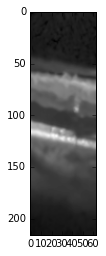

In [9]:
plt.imshow(images[0],cmap = "gray")

In [10]:
print (images[0].shape)


(216, 64)


In [11]:
labels = np.load('resized_cropped_labeledimages.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [12]:
print(labels_list[0].shape)

(216, 64)


In [13]:
labels_list[0][0][0]

0.0

In [14]:
train_labels = np.zeros((770,216,64,8))

In [15]:
for i in range(len(labels_list)) :
    for j in range(216) :
        for k in range(64):
            if(labels_list[i][j][k] == 0):
                train_labels[i][j][k][0] = 1
            if(labels_list[i][j][k] == 1):
                train_labels[i][j][k][1] = 1
            if(labels_list[i][j][k] == 2):
                train_labels[i][j][k][2] = 1
            if(labels_list[i][j][k] == 3):
                train_labels[i][j][k][3] = 1
            if(labels_list[i][j][k] == 4):
                train_labels[i][j][k][4] = 1
            if(labels_list[i][j][k] == 5):
                train_labels[i][j][k][5] = 1
            if(labels_list[i][j][k] == 6):
                train_labels[i][j][k][6] = 1
            if(labels_list[i][j][k] == 7):
                train_labels[i][j][k][7] = 1

In [16]:
train_labels.shape

(770, 216, 64, 8)

In [17]:
train_labels[0][0][0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [18]:
images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],216,64,1)

print(images[0].shape)
train_indices = np.random.choice(770,500,replace = False)
print(sorted(train_indices))
train_images_random = []
train_labels_random = []

for i in train_indices:
    train_images_random.append(images[i])
    train_labels_random.append(train_labels[i])

test_indices = [x for x in range(770) if x not in train_indices]
print(test_indices)
test_images = []
test_labels = []
for i in test_indices:
    test_images.append(images[i])
    test_labels.append(train_labels[i])

770
(216, 64, 1)
[2, 4, 5, 6, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 45, 47, 49, 50, 51, 52, 53, 54, 56, 57, 59, 61, 62, 63, 64, 65, 66, 68, 69, 70, 72, 73, 76, 77, 80, 81, 82, 83, 86, 87, 89, 91, 96, 97, 98, 99, 101, 103, 104, 105, 106, 107, 108, 110, 111, 113, 114, 116, 117, 118, 119, 120, 122, 124, 126, 128, 129, 130, 131, 132, 133, 138, 139, 140, 144, 147, 149, 152, 154, 155, 156, 157, 158, 159, 161, 164, 165, 166, 170, 172, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199, 200, 201, 202, 205, 207, 208, 210, 211, 213, 215, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 231, 232, 233, 234, 237, 240, 242, 243, 244, 245, 246, 248, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 269, 270, 272, 273, 274, 275, 276, 277, 280, 281, 285, 286, 288, 289, 292, 295, 296, 297, 298, 301, 303, 305, 306, 309, 310, 311, 312, 

In [19]:
train_images = np.array(train_images_random)
train_labels = np.array(train_labels_random)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [20]:
train_images = train_images.astype('float32')
train_labels = train_labels.astype('float32')
test_images = test_images.astype('float32')
test_labels = test_labels.astype('float32')

In [21]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(500, 216, 64, 1)
(270, 216, 64, 1)
(500, 216, 64, 8)


In [22]:
print(train_images[0])

[[[  2.]
  [  0.]
  [  0.]
  ..., 
  [ 11.]
  [ 18.]
  [ 13.]]

 [[  0.]
  [  0.]
  [  0.]
  ..., 
  [ 10.]
  [ 16.]
  [ 17.]]

 [[  2.]
  [  4.]
  [  1.]
  ..., 
  [ 10.]
  [ 17.]
  [ 19.]]

 ..., 
 [[ 24.]
  [ 23.]
  [ 22.]
  ..., 
  [ 13.]
  [ 12.]
  [ 12.]]

 [[ 24.]
  [ 24.]
  [ 23.]
  ..., 
  [ 12.]
  [ 13.]
  [ 14.]]

 [[ 25.]
  [ 24.]
  [ 23.]
  ..., 
  [ 12.]
  [ 13.]
  [ 14.]]]


In [23]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500, 216, 64, 8)


In [24]:
train_images.shape

(500, 216, 64, 1)

In [25]:
len(train_images)

500

In [26]:
data_shape = 216*64

In [27]:
weight_decay = 0.0001

In [28]:
# Defines the input tensor
inputs = Input(shape=(216,64,1))

L1 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(inputs)
L2 = BatchNormalization()(L1)
L2 = Activation('relu')(L2)
#L3 = Lambda(maxpool_1,output_shape = shape)(L2)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L3)
L5 = BatchNormalization()(L4)
L5 = Activation('relu')(L5)
#L6 = Lambda(maxpool_2,output_shape = shape)(L5)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L6)
L8 = BatchNormalization()(L7)
L8 = Activation('relu')(L8)
#L9 = Lambda(maxpool_3,output_shape = shape)(L8)
L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L9)
L11 = BatchNormalization()(L10)
L11 = Activation('relu')(L11)
L12 = UpSampling2D(size = (2,2))(L11)
#L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L13)
L15 = BatchNormalization()(L14)
L15 = Activation('relu')(L15)
L16 = UpSampling2D(size= (2,2))(L15)
#L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L17)
L19 = BatchNormalization()(L18)
L19 = Activation('relu')(L19)
#L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L21)
L23 = BatchNormalization()(L22)
L23 = Activation('relu')(L23)
L24 = Conv2D(8,kernel_size=(1,1),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L23)
L = Reshape((data_shape,8),input_shape = (216,64,8))(L24)
L = Activation('softmax')(L)
model = Model(inputs = inputs, outputs = L)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 216, 64, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 64, 64)       640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 64, 64)       256       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 64, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 32, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 32, 64)       36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 32, 64)       256       
__________

In [29]:
weights = np.load('weighted_cropped_images.npy')

In [30]:
weights.shape

(770, 216, 64)

In [31]:
weights[0][0][0]

1.0

In [32]:
np.unique(weights)

array([  1.   ,   4.336,   6.63 ,  12.007,  12.459,  14.647,  15.368,
        17.978,  19.336,  21.63 ,  27.007,  27.459,  29.647,  30.368,
        32.978])

In [33]:
weights_matrix = []
for i in train_indices:
    weights_matrix.append(weights[i])

In [34]:
sample_weights = np.array(weights_matrix)

In [35]:
sample_weights = np.reshape(sample_weights,(500,data_shape))

In [36]:
sample_weights.shape

(500, 13824)

In [37]:
len(train_images)

500

In [38]:
train_labels.shape

(500, 216, 64, 8)

In [39]:
train_labels = np.reshape(train_labels,(500,data_shape,8))
test_labels = np.reshape(test_labels,(270,data_shape,8))

In [40]:
train_labels.shape

(500, 13824, 8)

In [36]:
count = np.zeros(8)

In [37]:
for i in range(500):
    for j in range(13824):
        for k in range(8):
            if(train_labels[i][j][k]==1):
                count[k] = count[k]+1

In [408]:
for i in range(8):
    print(count[i])

3972411.0
312782.0
605075.0
341224.0
263099.0
920815.0
274885.0
221709.0


In [409]:
count

array([ 3972411.,   312782.,   605075.,   341224.,   263099.,   920815.,
         274885.,   221709.])

In [410]:
median = np.median(count)

In [411]:
median

327003.0

In [364]:
scale = np.zeros(8)

In [367]:
for i in range(8):
    scale[i] = (median/count[i])

In [368]:
scale

array([ 0.08176891,  1.01882538,  0.54272503,  0.98185769,  1.25668549,
        0.354605  ,  1.19773269,  1.47007454])

In [369]:
weights = np.zeros(8)
for i in range(8):
    weights[i] = scale[i]/scale[0]

In [370]:
weights

array([  1.        ,  12.45981304,   6.63730261,  12.00771353,
        15.36874386,   4.33667245,  14.6477755 ,  17.97840371])

In [41]:
smooth = 1

In [42]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [43]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [44]:
def customized_loss(y_true,y_pred):
    return (1*K.categorical_crossentropy(y_true, y_pred))+(0.5*dice_coef_loss(y_true, y_pred))

In [45]:
optimiser = optimizers.Adam(lr = 0.01)

In [46]:
model.compile(optimizer=optimiser,loss=customized_loss,metrics=['accuracy',dice_coef],sample_weight_mode='temporal')

In [47]:
train_images[0].shape

(216, 64, 1)

In [48]:
#Defining Callback functions which will be called by model during runtime when specified condition satisfies
lr_reducer = ReduceLROnPlateau(factor=0.5, cooldown=0, patience=6, min_lr=0.5e-6)
csv_logger = CSVLogger('Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.csv')
model_chekpoint = ModelCheckpoint("Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.hdf5",monitor = 'val_loss',verbose = 1,save_best_only=True)

In [ ]:

model.fit(train_images,train_labels,batch_size=20,epochs=200,validation_data=(test_images,test_labels),sample_weight=sample_weights,callbacks=[lr_reducer, csv_logger,model_chekpoint])

Train on 500 samples, validate on 270 samples
Epoch 1/200
380/500 [=====================>........] - ETA: 15s - loss: 45.2449 - acc: 0.6268 - dice_coef: 0.5852

In [49]:
model.load_weights("Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.hdf5")

In [86]:
testing_image = train_images[28]

In [87]:
testing_image.shape

(216, 64, 1)

In [88]:
testing_image = np.squeeze(testing_image,axis = 2)

In [89]:
testing_image.shape

(216, 64)

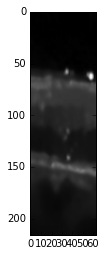

In [90]:
plt.imshow(testing_image,cmap = "gray")

In [91]:
plt.show()

In [92]:
testing_image = testing_image.reshape((1,216,64,1))

In [93]:
prediction = model.predict(testing_image)

In [94]:
prediction = np.squeeze(prediction,axis = 0)

In [95]:
print(prediction.shape)


(13824, 8)


In [96]:
np.argmax(prediction[6999])

4

In [97]:
prediction = np.reshape(prediction,(216,64,8))

In [98]:
output = np.zeros((216,64))

In [99]:
ground = np.zeros((216,64))

In [100]:
for i in range(216):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [101]:
test_labels[0].shape

(13824, 8)

In [102]:
test_labels[250][6999]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [103]:
test_ground_truth = np.reshape(train_labels[28],(216,64,8))

In [104]:
for i in range(216):
    for j in range(64):
        index = np.argmax(test_ground_truth[i][j])
        ground[i][j] = index

In [105]:
for i in range(216):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [106]:
print (output.shape)

(216, 64)


In [107]:
color= np.zeros((216,64,3))

In [108]:
c0 = 0
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
c6 = 0
c7 = 0

In [109]:
for j in range(216):
    for k in range(64):
        if(output[j][k]==0):
            c0 = c0 + 1
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            c1 = c1 + 1
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            c2 = c2 + 1
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            c3 = c3 + 1
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            c4 = c4 + 1
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            c5 = c5 + 1
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            c6 = c6 + 1
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            c7 = c7 + 1
            color[j][k] = [64,128,0]

In [110]:
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
print(c7)


8088
789
993
675
816
1438
513
512


In [111]:
%matplotlib inline

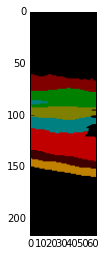

In [112]:
plt.imshow(color)

In [113]:
plt.show()

In [114]:
imsave("results2.png",color)

In [115]:
%matplotlib inline

In [116]:
plt.show()

In [117]:
color= np.zeros((216,64,3))

In [118]:
c0 = 0
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
c6 = 0
c7 = 0

In [119]:
for j in range(216):
    for k in range(64):
        if(ground[j][k]==0):
            c0 = c0 + 1
            color[j][k] = [0,0,0]
        if(ground[j][k]==1):
            c1 = c1 + 1
            color[j][k] = [128,0,0]
        if(ground[j][k]==2):
            c2 = c2 + 1
            color[j][k] = [0,128,0]
        if(ground[j][k]==3):
            c3 = c3 + 1
            color[j][k] = [128,128,0] 
        if(ground[j][k]==4):
            c4 = c4 + 1
            color[j][k] = [0,128,128]
        if(ground[j][k]==5):
            c5 = c5 + 1
            color[j][k] = [64,0,0]
        if(ground[j][k]==6):
            c6 = c6 + 1
            color[j][k] = [192,0,0]
        if(ground[j][k]==7):
            c7 = c7 + 1
            color[j][k] = [64,128,0]

In [120]:
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
print(c7)


8273
592
1035
703
763
1501
548
409


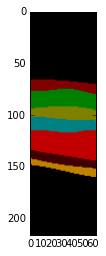

In [121]:
plt.imshow(color)

In [322]:
imsave("results.png",color)

In [134]:
plt.show()